# Ejemplo de capacidad de proceso



 Supongamos que estas cifras representan las medidas de un componente específico en el proceso de moldeo por inyección.

Para ello, necesitamos saber:

Límite superior de especificación (USL)
Límite inferior de especificación (LSL)
Media y desviación estándar de nuestros datos
Vamos a considerar USL = 10, LSL = 6, y vamos a generar un conjunto de datos aleatorio con una media de 8 y una desviación estándar de 1.

In [1]:
import numpy as np
import scipy.stats as stats

# Límites de especificación
USL = 10
LSL = 6

# Generamos 1000 datos aleatorios con media 8 y desviación estándar 1
np.random.seed(0)
data = np.random.normal(8, 1, 1000)

# Calculamos la media y la desviación estándar de nuestros datos
mean = np.mean(data)
std_dev = np.std(data)

# Calculamos Cp
Cp = (USL - LSL) / (6*std_dev)

# Calculamos Cpk
Cpk = min((USL - mean) / (3*std_dev), (mean - LSL) / (3*std_dev))

print(f'Cp: {Cp}')
print(f'Cpk: {Cpk}')


Cp: 0.6754247927857252
Cpk: 0.6601410416463604


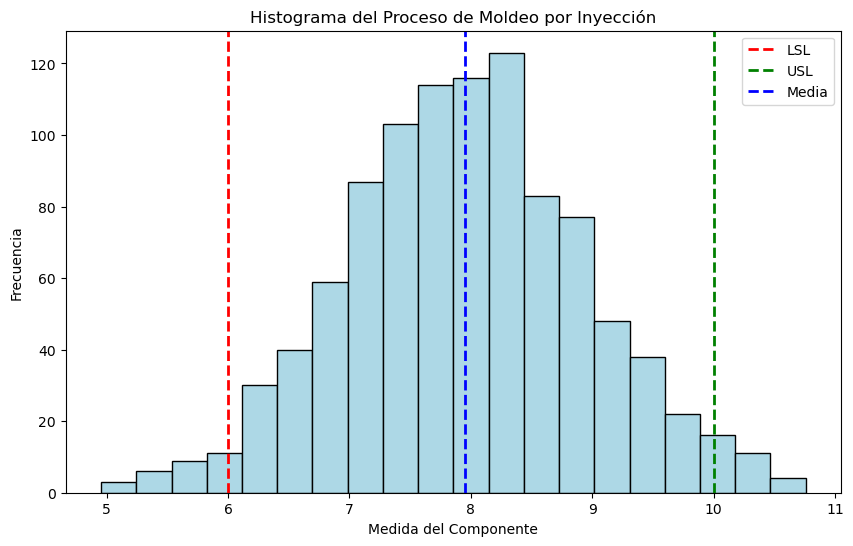

In [2]:
import matplotlib.pyplot as plt

# Genera un histograma de los datos
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='lightblue', edgecolor='black')

# Añade líneas para los límites de especificación
plt.axvline(x=LSL, color='red', linestyle='dashed', linewidth=2, label='LSL')
plt.axvline(x=USL, color='green', linestyle='dashed', linewidth=2, label='USL')

# Añade una línea para la media
plt.axvline(x=mean, color='blue', linestyle='dashed', linewidth=2, label='Media')

plt.title('Histograma del Proceso de Moldeo por Inyección')
plt.xlabel('Medida del Componente')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()


Si los datos no siguen una distribución normal, existen varias opciones disponibles para su análisis.

Transformación de los Datos: Algunas veces, los datos pueden ser transformados para seguir una distribución normal. Las transformaciones comunes incluyen logarítmicas, cuadráticas, de raíz cuadrada, entre otras. Sin embargo, la utilidad de estas transformaciones dependerá de la naturaleza exacta de tus datos.

Usar Pruebas No Paramétricas: Las pruebas no paramétricas no asumen ninguna distribución específica de los datos. Por ejemplo, en lugar de usar la media y la desviación estándar para calcular la capacidad del proceso, podrías usar percentiles.

Establecer Límites de Control Empíricos: En algunos casos, es posible establecer límites de control basados en la experiencia y los datos históricos.

Usar una Distribución Diferente: Si los datos siguen alguna otra distribución conocida (por ejemplo, binomial, Poisson, etc.), podría ser más apropiado usar esa distribución para calcular la capacidad del proceso.

En cualquier caso, es fundamental comprender la naturaleza de tus datos y el contexto del proceso para tomar la decisión correcta. Si no estás seguro de qué método usar, podría ser útil consultar a un estadístico o un ingeniero de calidad con experiencia.

En el siguiente ejemplo, supongamos que los datos siguen una distribución log-normal. Una transformación común para normalizar los datos log-normales es aplicar el logaritmo a cada punto de datos.

Aquí tienes un ejemplo en Python de cómo hacer esto:

In [3]:
# Generamos 1000 datos aleatorios con una distribución log-normal
np.random.seed(0)
data_lognormal = np.random.lognormal(2, 0.4, 1000)



Aquí, se muestran los datos originales de la distribución log-normal con sus límites de especificación originales, y la línea de la media también se basa en estos datos originales. Esto proporciona una visualización de cómo se distribuyen los datos originales en relación con los límites de especificación, antes de aplicar cualquier transformación.

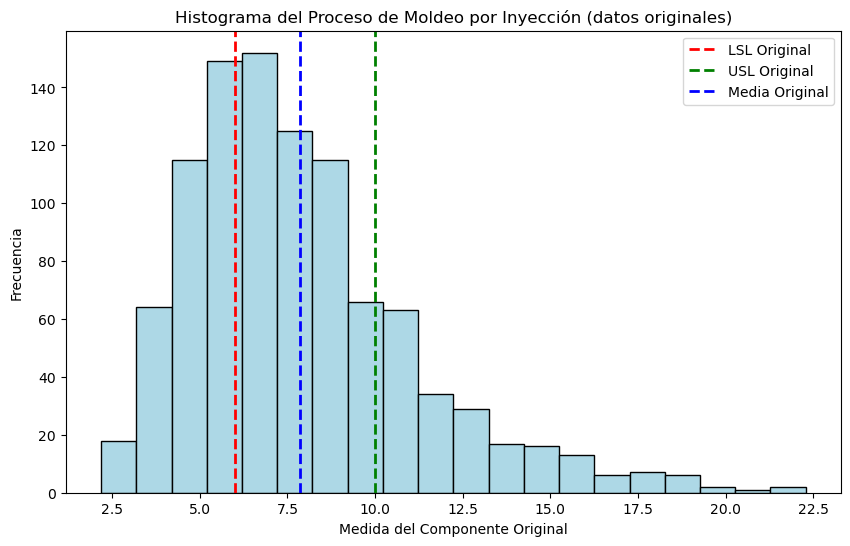

In [4]:
# Calculamos la media y la desviación estándar de nuestros datos originales
mean_original = np.mean(data_lognormal)
std_dev_original = np.std(data_lognormal)

# Generamos el histograma de los datos originales
plt.figure(figsize=(10, 6))
plt.hist(data_lognormal, bins=20, color='lightblue', edgecolor='black')

# Añade líneas para los límites de especificación originales
plt.axvline(x=LSL, color='red', linestyle='dashed', linewidth=2, label='LSL Original')
plt.axvline(x=USL, color='green', linestyle='dashed', linewidth=2, label='USL Original')

# Añade una línea para la media original
plt.axvline(x=mean_original, color='blue', linestyle='dashed', linewidth=2, label='Media Original')

plt.title('Histograma del Proceso de Moldeo por Inyección (datos originales)')
plt.xlabel('Medida del Componente Original')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()


Cp: 0.21564018192611456
Cpk: 0.1605297705434233


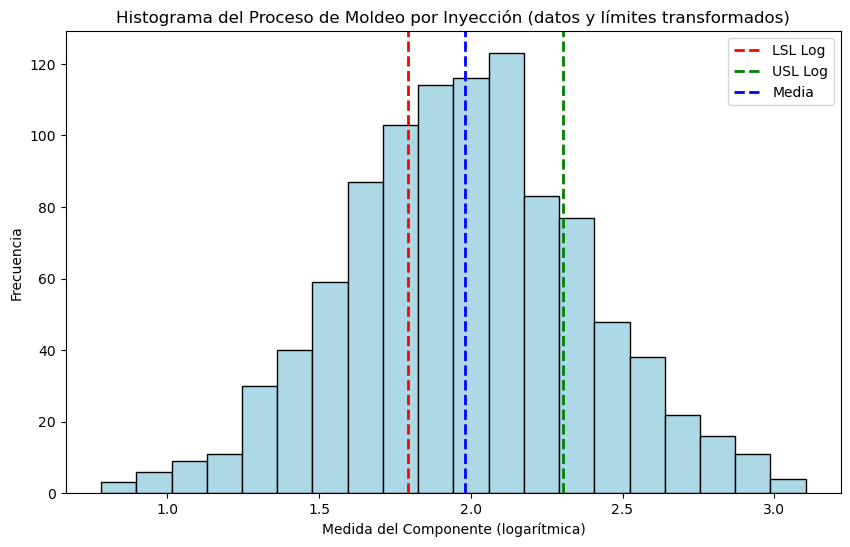

In [5]:
# Aplicamos la transformación logarítmica
data = np.log(data_lognormal)

# Transformamos también los límites de especificación
LSL_log = np.log(LSL)
USL_log = np.log(USL)

# Calculamos la media y la desviación estándar de nuestros datos
mean = np.mean(data)
std_dev = np.std(data)

# Calculamos Cp
Cp = (USL_log - LSL_log) / (6*std_dev)

# Calculamos Cpk
Cpk = min((USL_log - mean) / (3*std_dev), (mean - LSL_log) / (3*std_dev))

print(f'Cp: {Cp}')
print(f'Cpk: {Cpk}')

# Generamos el histograma de los datos
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='lightblue', edgecolor='black')

# Añade líneas para los límites de especificación transformados
plt.axvline(x=LSL_log, color='red', linestyle='dashed', linewidth=2, label='LSL Log')
plt.axvline(x=USL_log, color='green', linestyle='dashed', linewidth=2, label='USL Log')

# Añade una línea para la media
plt.axvline(x=mean, color='blue', linestyle='dashed', linewidth=2, label='Media')

plt.title('Histograma del Proceso de Moldeo por Inyección (datos y límites transformados)')
plt.xlabel('Medida del Componente (logarítmica)')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()


## Interpretación

Cp (Índice de Capacidad del Proceso): Este índice mide la capacidad potencial de un proceso para producir productos que cumplan con las especificaciones. Es el rango de especificaciones dividido por seis veces la desviación estándar de la población del proceso. Un valor de Cp mayor a 1 indica que el proceso tiene la capacidad de producir dentro de las especificaciones, asumiendo que el proceso está centrado. Sin embargo, el Cp no tiene en cuenta si el proceso está realmente centrado o no.

Cpk (Índice de Capacidad del Proceso Ajustado): Este índice mide la capacidad actual de un proceso para producir productos que cumplan con las especificaciones, teniendo en cuenta la posición del proceso respecto a los límites de especificación. El Cpk considera el centrado del proceso en relación con los límites de especificación y la variabilidad del mismo.

    Un Cpk de 1.0 es considerado como el límite mínimo aceptable en muchos sectores de la industria, indicando que el proceso produce 99.73% de los productos dentro de las especificaciones si la distribución es normal y el proceso está centrado.
    
    Un Cpk mayor a 1.0 significa que el proceso es capaz de producir una mayor proporción de productos dentro de las especificaciones.
    
    Un Cpk menor a 1.0 indica que el proceso no es capaz y necesita mejoras, dado que no cumple con las especificaciones de manera efectiva.

En nuestros ejemplos, estos índices se calcularon tanto para datos transformados como para no transformados. Los índices para los datos transformados pueden ser interpretados de la misma forma que se describió anteriormente. Sin embargo, es importante recordar que estos valores se basan en los datos transformados y los límites transformados. Por lo tanto, aunque proporcionan información útil sobre el proceso, deben interpretarse en el contexto de los datos transformados.